In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

import constants as c
import fgh

%matplotlib inline

find DOS

In [119]:
atom_ind = 0
atoms = ('li','k','cs')
n_maxs = (34,98,208)
L_maxs = (57,162,342)

atom = atoms[atom_ind]
n_max = n_maxs[atom_ind]
L_max = L_maxs[atom_ind]
dimer = atom+'+'+atom
collision = atom+'2+'+atom

In [120]:
# only s-wave collisions
E_rovib_gs = np.loadtxt('dos/{0}/{0}+{0}_n0.txt'.format(atom))[0] * 3.2e5
E_res_chn = np.array([])
for i in range(0,np.min([n_max,L_max])):
    fname_dimer = 'dos/{0}/{0}+{0}_n{1}.txt'.format(atom,i)
    E_dimer = np.loadtxt(fname_dimer) * 3.2e5
    fname_collision = 'dos/{0}/{0}2+{0}_L{1}.txt'.format(atom,i)
    E_collision = np.loadtxt(fname_collision) * 3.2e5
    for j in range(0,E_dimer.size):
        if E_dimer.size > 1:
            E_res_chn = np.append(E_res_chn, E_collision+(E_dimer[j]-E_rovib_gs))
        else:
            E_res_chn = np.append(E_res_chn, E_collision+(E_dimer-E_rovib_gs))
E_res_chn = np.sort(E_res_chn)   

In [121]:
print(E_res_chn[0])

-876.975856484


In [123]:
print(E_res_chn[0])

-876.975856484


0.494119317648
0.00202380268143


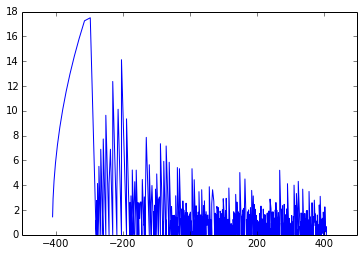

In [115]:
def find_E0_ind(E):
    # assumes sorted E
    ind = np.where(E>0)
    return np.min(ind)

E_res_chn = np.sort(E_res_chn)
d = np.zeros(E_res_chn.size-1)
for i in range(0,d.size-1):
    d[i] = E_res_chn[i+1]-E_res_chn[i]
plt.plot(E_res_chn[0:-1],d)
E0_ind = find_E0_ind(E_res_chn)
print(np.mean(d[(E0_ind-10):(E0_ind+10)]))
print(1.0/np.mean(d[(E0_ind-10):(E0_ind+10)])/1000.0)

In [122]:

E_res_chn = np.array([])
lb = -10000
ub = 10000
for n in range(0,n_max):
    fname_dimer = 'dos/{0}/{0}+{0}_n{1}.txt'.format(atom,n)
    E_dimer = np.loadtxt(fname_dimer) * 3.2e5
    for L in range(0,L_max):
        fname_collision = 'dos/{0}/{0}2+{0}_L{1}.txt'.format(atom,L)
        E_collision = np.loadtxt(fname_collision) * 3.2e5
        for k in range(0,E_dimer.size):
            if E_dimer.size > 1:
                E_temp = E_collision+(E_dimer[k]-E_rovib_gs)
            else:
                E_temp = E_collision+(E_dimer-E_rovib_gs)
            ind = np.where(np.logical_and(E_temp>lb,E_temp<ub))
            if E_temp.size > 1:
                E_res_chn = np.append(E_res_chn, E_temp[ind[0]])
            else:
                E_res_chn = np.append(E_res_chn, E_temp)               
E_res_chn = np.sort(E_res_chn)

In [44]:
# corroborate numbers by counting number of states in range

rovib_gnd_dos = np.where(np.logical_and(E_res_chn < 500e-3,E_res_chn>-500e-3))
print(rovib_gnd_dos[0].size)

4


In [45]:
# only s-wave collisions
E_rovib_gs = np.loadtxt('dos/{0}/{0}+{0}_n0.txt'.format(atom))[0] * 3.2e5
E_res_chn = np.array([])
for i in range(0,np.min([n_max,L_max])):
    fname_dimer = 'dos/{0}/{0}+{0}_n{1}.txt'.format(atom,i)
    E_dimer = np.loadtxt(fname_dimer) * 3.2e5
    fname_collision = 'dos/{0}/{0}2+{0}_L{1}.txt'.format(atom,i)
    E_collision = np.loadtxt(fname_collision) * 3.2e5
    for j in range(0,E_dimer.size):
        if E_dimer.size > 1:
            E_res_chn = np.append(E_res_chn, E_collision+(E_dimer[j]-E_rovib_gs))
        else:
            E_res_chn = np.append(E_res_chn, E_collision+(E_dimer-E_rovib_gs))
E_res_chn = np.sort(E_res_chn)     

-409.253384806


In [66]:
print(E_res_chn[0])

-710.664501023


In [79]:
# convert energy to K
rovib_gnd_dos = np.where(np.logical_and(E_res_chn < 50e-3,E_res_chn>-50e-3))
print(rovib_gnd_dos[0].size)

10037


In [69]:
print(E_res_chn.size)

21970


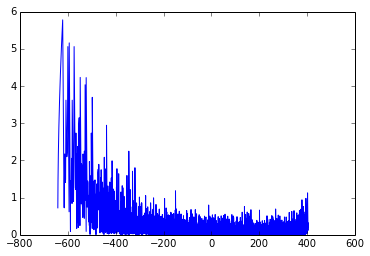

In [107]:
E_res_chn = np.sort(E_res_chn)
d = np.zeros(E_res_chn.size)
for i in range(0,d.size-1):
    d[i] = E_res_chn[i+1]-E_res_chn[i]
d[-1] = d[-2]
plt.plot(E_res_chn,d)


In [108]:
np.mean(d[2770:2786])

0.086127179881263061

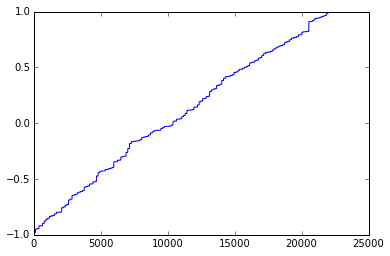

In [85]:
plt.plot(E_res_chn)

In [86]:
def find_E0_ind(E):
    # assumes sorted E
    ind = np.where(E>0)
    return np.min(ind)

In [106]:
find_E0_ind(E_res_chn)

2778

1.15398829548e-07
1.73194357255e-07


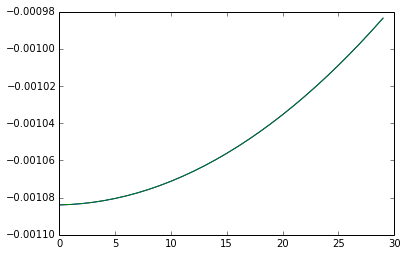

In [68]:
# check vibrational and rotational splitting
E = np.zeros(30)
for n in range(0,30):
    E[n] = np.loadtxt('dos/{0}/{0}+{0}_n{1}.txt'.format(atom,n))[0]
plt.plot(E)

f = lambda n,b,c: b*n*(n+1)+c
s = sp.optimize.curve_fit(f,np.arange(0,30),E)
plt.plot(f(np.arange(0,30),s[0][0],s[0][1]))
print(s[0][0])

m = 39.0983 / 5.485e-4 / 2.0
Re = 9
th = 1.0 / (2*m*Re**2)
print(th)

In [ ]:
E_res_chn = np.array([])
lb = -1
ub = 1
for n in range(0,n_max):
    fname_dimer = 'dos/{0}/{0}+{0}_n{1}.txt'.format(atom,n)
    E_dimer = np.loadtxt(fname_dimer) * 3.2e5
    for L in range(0,L_max):
        fname_collision = 'dos/{0}/{0}2+{0}_L{1}.txt'.format(atom,L)
        E_collision = np.loadtxt(fname_coll) * 3.2e5
        for k in range(0,E_dimer.size):
            if E_dimer.size > 1:
                E_temp = E_collision+(E_dimer[k]-E_rovib_gs)
            else:
                E_temp = E_collision+(E_dimer-E_rovib_gs)
            ind = np.where(np.logical_and(E_temp>lb,E_temp<ub))
            E_res_chn = np.append(E_res_chn, E_temp[ind[0]])